# PROJECTS

PROJECT 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Companies-profit.csv')

In [4]:
df.describe

<bound method NDFrame.describe of      R&D Spend  Administration  Marketing Spend       City        Profit
0    165349.20      136897.800      471784.1000     Mumbai  192261.83000
1    162597.70      151377.590      443898.5300  Bangalore  191792.06000
2    153441.51      101145.550      407934.5400      Delhi  191050.39000
3    144372.41      118671.850      383199.6200     Mumbai  182901.99000
4    142107.34       91391.770      366168.4200      Delhi  166187.94000
..         ...             ...              ...        ...           ...
995   54135.00      118451.999      173232.6695  Bangalore   95279.96251
996  134970.00      130390.080      329204.0228  Bangalore  164336.60550
997  100275.47      241926.310      227142.8200  Bangalore  413956.48000
998  128456.23      321652.140      281692.3200  Bangalore  333962.19000
999  161181.72      270939.860      295442.1700     Mumbai  476485.43000

[1000 rows x 5 columns]>

In [5]:
df.shape

(1000, 5)

In [6]:
dummies=pd.get_dummies(df.City)
dummies

,Bangalore,Delhi,Mumbai
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


In [7]:
merged = pd.concat([df,dummies],axis='columns')
merged

,R&D Spend,Administration,Marketing Spend,City,Profit,Bangalore,Delhi,Mumbai
0,165349.20,136897.800,471784.1000,Mumbai,192261.83000,0,0,1
1,162597.70,151377.590,443898.5300,Bangalore,191792.06000,1,0,0
2,153441.51,101145.550,407934.5400,Delhi,191050.39000,0,1,0
3,144372.41,118671.850,383199.6200,Mumbai,182901.99000,0,0,1
4,142107.34,91391.770,366168.4200,Delhi,166187.94000,0,1,0
...,...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,Bangalore,95279.96251,1,0,0
996,134970.00,130390.080,329204.0228,Bangalore,164336.60550,1,0,0
997,100275.47,241926.310,227142.8200,Bangalore,413956.48000,1,0,0
998,128456.23,321652.140,281692.3200,Bangalore,333962.19000,1,0,0


In [8]:
df1=merged.drop(['City','Mumbai'],axis='columns')
df1

,R&D Spend,Administration,Marketing Spend,Profit,Bangalore,Delhi
0,165349.20,136897.800,471784.1000,192261.83000,0,0
1,162597.70,151377.590,443898.5300,191792.06000,1,0
2,153441.51,101145.550,407934.5400,191050.39000,0,1
3,144372.41,118671.850,383199.6200,182901.99000,0,0
4,142107.34,91391.770,366168.4200,166187.94000,0,1
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,1,0
996,134970.00,130390.080,329204.0228,164336.60550,1,0
997,100275.47,241926.310,227142.8200,413956.48000,1,0
998,128456.23,321652.140,281692.3200,333962.19000,1,0


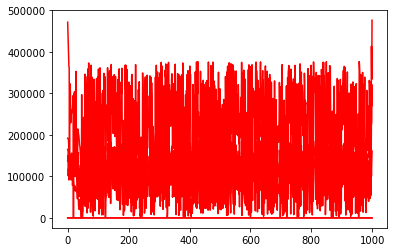

In [9]:
plt.plot(df1, 'r')
plt.show()


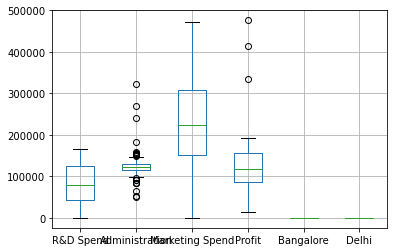

In [10]:
df1.boxplot();

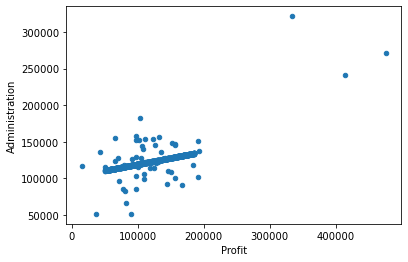

In [11]:
df1.plot.scatter(x='Profit',y='Administration');

Linear regression is the next step up after correlation. It is used when we want to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable (or sometimes, the outcome variable). The variable we are using to predict the other variable's value is called the independent variable (or sometimes, the predictor variable).

In [12]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

In [13]:
X=df1.drop(['Profit'],axis='columns')
X

,R&D Spend,Administration,Marketing Spend,Bangalore,Delhi
0,165349.20,136897.800,471784.1000,0,0
1,162597.70,151377.590,443898.5300,1,0
2,153441.51,101145.550,407934.5400,0,1
3,144372.41,118671.850,383199.6200,0,0
4,142107.34,91391.770,366168.4200,0,1
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,1,0
996,134970.00,130390.080,329204.0228,1,0
997,100275.47,241926.310,227142.8200,1,0
998,128456.23,321652.140,281692.3200,1,0


In [14]:
y = df1.Profit
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

In [17]:
lm.score(X_test,y_test)
lm.score(X_train,y_train)

0.9388481257147384

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

7568.625303474364

In [19]:
mse

57284088.98439241

PROJECT - 3

In [21]:
df2 = pd.read_csv('Disease.csv')

In [22]:
df2.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [23]:
df2.isnull()

,Disease,Age,Number,Start
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
76,False,False,False,False
77,False,False,False,False
78,False,False,False,False
79,False,False,False,False


In [24]:
dummies1=pd.get_dummies(df2.Disease)
dummies1

,absent,present
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
76,0,1
77,1,0
78,1,0
79,0,1


In [25]:
merged1 = pd.concat([df2,dummies1],axis='columns')
merged1

,Disease,Age,Number,Start,absent,present
0,absent,71,3,5,1,0
1,absent,158,3,14,1,0
2,present,128,4,5,0,1
3,absent,2,5,1,1,0
4,absent,1,4,15,1,0
...,...,...,...,...,...,...
76,present,157,3,13,0,1
77,absent,26,7,13,1,0
78,absent,120,2,13,1,0
79,present,42,7,6,0,1


In [26]:
df3=merged1.drop(['Disease','absent'],axis='columns')
df3

,Age,Number,Start,present
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0
...,...,...,...,...
76,157,3,13,1
77,26,7,13,0
78,120,2,13,0
79,42,7,6,1


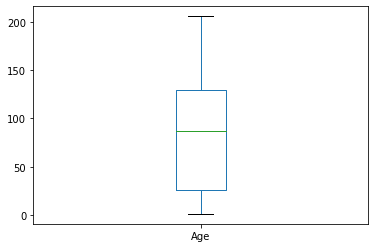

In [28]:
df3['Age'].plot.box()

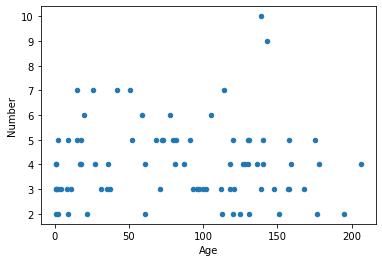

In [30]:
df3.plot.scatter(x='Age',y='Number')

In [31]:
from sklearn.linear_model import LogisticRegression
lrc= LogisticRegression()

In [33]:
X=df3.drop(['present'],axis='columns')
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [35]:
y = df3.present
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: present, Length: 81, dtype: uint8

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [58]:
lrc.fit(X_train, y_train)
y_pred=lrc.predict(X_test)

In [59]:
print("Logistics Regression accurary - training: ", lrc.score(X_train,y_train))
print("Logistics Regression accurary - test: ", lrc.score(X_test,y_test))

Logistics Regression accurary - training:  0.859375
Logistics Regression accurary - test:  0.8823529411764706


PROJECT 4

In [60]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [62]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [65]:
X = iris.data[:, 2:]
y = iris.target

In [66]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

Text(0, 0.5, 'Petal Width')

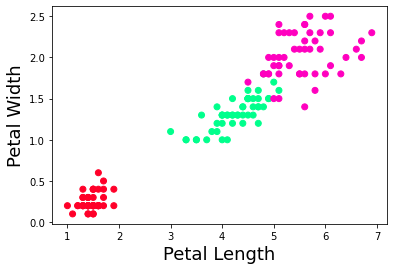

In [67]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

In [69]:
km = KMeans(n_clusters = 4,  random_state=21)
km.fit(X)

KMeans(n_clusters=4, random_state=21)

In [70]:
centers = km.cluster_centers_
print(centers)

[[5.80285714 2.11142857]
 [1.462      0.246     ]
 [3.92222222 1.1962963 ]
 [4.77894737 1.61578947]]


Text(0.5, 1.0, 'Predicted')

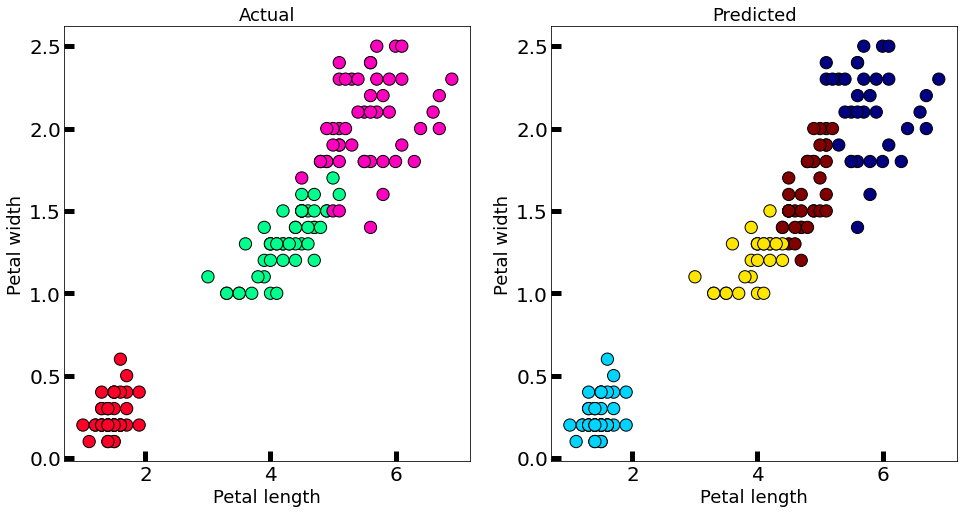

In [71]:
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)